In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os 
import seaborn as sns
import scipy

#https://www.kff.org/state-category/health-status/opioids/
#https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm
#https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm

In [5]:
 
def right(value, count):
    # To get right part of string, use negative first index in slice.
    return value[-count:]
def left(value, count):
    # To get left part of string, use negative first index in slice.
    return value[:count]



# Loading the Data from multiple Files and integerate it in one single  extract that can be used for Exploritory analysis

In [22]:
## directory to read
source='C:/Viren/Data/IU-DataScience/Opiod-Epidemic-Project/data'
death_data=pd.DataFrame()
byType=pd.DataFrame()
byRace=pd.DataFrame()
byGender=pd.DataFrame()
byAge=pd.DataFrame()

Opiod_combined=pd.DataFrame()

listOfFiles = os.listdir(source)
for l in listOfFiles:
    if right(l,3)=='csv' and left(l,3)=='Opi':
        
        if left(l,15)=='Opiod_Dealth_20':   ## read death file
            f1=pd.read_csv(source+"/"+l, header=0, names=['state','opdDeath','AllOverdoseDeath','OpdDeath%'])
            year=l.split('_')
            f1['year']=year[-1].replace('.csv','') ## pick the year
            death_data=pd.concat([death_data,f1])      ## append the dataset
            del f1
        
        if left(l,20)=='Opiod_Dealth_By_Type':   ## read death file
            f2=pd.read_csv(source+"/"+l, header=0, names=["state1","Oxy&Hydocodone","fenty&Tramadol","Methadone","Heroin"])
            year=l.split('_')
            f2['year1']=year[-1].replace('.csv','')
            byType=pd.concat([byType,f2])
            del f2
        if left(l,20)=='Opiod_Dealth_By_Race':   ## read death file
            f3=pd.read_csv(source+"/"+l, header=0, names=['states2',"White","Black","Hispanic","Race_Total"])
            year=l.split('_')
            f3['year2']=year[-1].replace('.csv','')
            byRace=pd.concat([byRace,f3])
            del f3
        if left(l,22)=='Opiod_Dealth_By_Gender':   ## read death file
            f4=pd.read_csv(source+"/"+l, header=0,  names=['states3',"Male","Female","GenderTotal"])
            year=l.split('_')
            f4['year3']=year[-1].replace('.csv','')
            byGender=pd.concat([byGender,f4])
            del f4
        if left(l,24)=='Opiod_Dealth_By_AgeGroup':   ## read death file
            f5=pd.read_csv(source+"/"+l, header=0,  names=['states4',"0-24","25-34","35-44","45-54","55+","AgeTotal"])
            year=l.split('_')
            f5['year4']=year[-1].replace('.csv','')
            byAge=pd.concat([byAge,f5])
            del f5
           


In [23]:
Opiod_combined=pd.merge(death_data, byType, how='inner', left_on=['state','year'], right_on=['state1','year1'])

In [24]:
Opiod_combined=pd.merge(Opiod_combined, byRace, how='inner', left_on=['state','year'], right_on=['states2', 'year2'] )

In [25]:
Opiod_combined=pd.merge(Opiod_combined, byGender, how='inner', left_on=['state', 'year'], right_on=['states3','year3'])

In [26]:
Opiod_combined=pd.merge(Opiod_combined, byAge, how='inner', left_on=['state','year'], right_on=['states4','year4'])

In [27]:
Opiod_combined.columns

Index(['state', 'opdDeath', 'AllOverdoseDeath', 'OpdDeath%', 'year', 'state1',
       'Oxy&Hydocodone', 'fenty&Tramadol', 'Methadone', 'Heroin', 'year1',
       'states2', 'White', 'Black', 'Hispanic', 'Race_Total', 'year2',
       'states3', 'Male', 'Female', 'GenderTotal', 'year3', 'states4', '0-24',
       '25-34', '35-44', '45-54', '55+', 'AgeTotal', 'year4'],
      dtype='object')

In [28]:
Opiod_combined=Opiod_combined.replace('NSD', 0, regex=True)
Opiod_combined=Opiod_combined.drop(columns=['state1','states2','states3','states4'])


In [29]:
Opiod_combined= Opiod_combined.drop(columns=['year1','year2','year3','year4'])

In [30]:
Opiod_combined=Opiod_combined.loc[Opiod_combined['state']!='United States']

In [31]:
Opiod_combined.Race_Total= pd.to_numeric(Opiod_combined.White) +pd.to_numeric(Opiod_combined.Black) +pd.to_numeric(Opiod_combined.Hispanic)

In [32]:
Opiod_combined.GenderTotal=pd.to_numeric(Opiod_combined.Male) + pd.to_numeric(Opiod_combined.Female)

In [33]:
Opiod_combined.GenderTotal=pd.to_numeric(Opiod_combined['0-24'])+ pd.to_numeric(Opiod_combined['25-34'])+pd.to_numeric(Opiod_combined['35-44'])+pd.to_numeric(Opiod_combined['45-54']) + pd.to_numeric(Opiod_combined['55+']) 

In [34]:
Opiod_combined.to_csv(source+"/"+'Final_OpiodData2010_2016.csv')

# Reading the Data from Final Extract located in github.

In [21]:
source='https://raw.githubusercontent.com/rashray/Opiod-Epidemic-Project/master/data/Final_OpiodData2010_2016.csv'
Opiod_combined=pd.read_csv(source)

In [22]:
Opiod_combined2=Opiod_combined[Opiod_combined.year>=2013]
Opiod_combined2=Opiod_combined[['opdDeath','AllOverdoseDeath','OpdDeath%','year','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin','White','Black','Hispanic','Race_Total','Male','Female','GenderTotal']].apply(pd.to_numeric)
#Opiod_combined2['state']=Opiod_combined.state.str[:4]
Opiod_combined2['state']=Opiod_combined.state

In [23]:
Opiod_combined2.head()

,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal,state
0,187,547,0.34,2010,82,34,78,0,177,0,0,177,117,70,187,Alabama
1,62,83,0.75,2010,38,10,25,0,49,0,0,49,32,30,49,Alaska
2,626,1098,0.57,2010,327,68,106,90,483,19,91,593,372,254,626,Arizona
3,189,350,0.54,2010,118,57,56,0,177,0,0,177,101,88,189,Arkansas
4,1929,4057,0.48,2010,1063,205,456,326,1442,130,302,1874,1225,704,1929,California


In [10]:
del Opiod_combined
Opiod_combined2.describe()

,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,White,Black,Hispanic,Race_Total,Male,Female,GenderTotal
count,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,549.212885,919.450980,0.597815,2013.000000,236.62465,128.036415,73.929972,169.263305,450.873950,35.260504,35.585434,521.719888,355.966387,193.042017,539.417367
std,558.058739,937.162797,0.158514,2.002807,228.25076,247.213848,78.423534,236.459579,448.092221,68.298806,77.772115,551.754897,381.822211,180.757305,566.640635
min,0.000000,16.000000,0.000000,2010.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,250.000000,0.480000,2011.000000,61.00000,22.000000,22.000000,17.000000,112.000000,0.000000,0.000000,115.000000,81.000000,50.000000,119.000000
50%,407.000000,635.000000,0.610000,2013.000000,173.00000,57.000000,55.000000,79.000000,346.000000,0.000000,0.000000,382.000000,242.000000,156.000000,407.000000
75%,714.000000,1172.000000,0.710000,2015.000000,328.00000,120.000000,96.000000,232.000000,623.000000,45.000000,30.000000,697.000000,463.000000,266.000000,714.000000
max,3613.000000,4728.000000,0.910000,2016.000000,1169.00000,2296.000000,458.000000,1478.000000,3217.000000,560.000000,473.000000,3602.000000,2468.000000,1145.000000,3613.000000


<Figure size 1080x720 with 0 Axes>

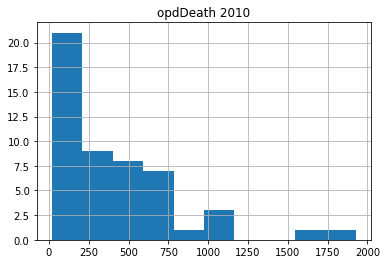

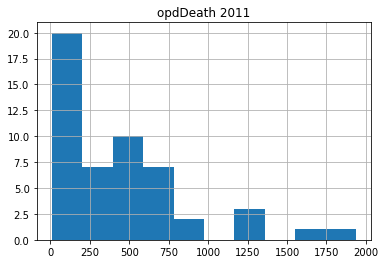

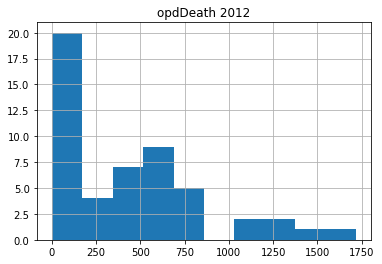

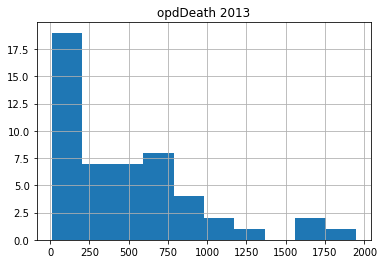

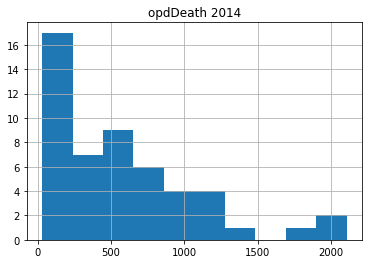

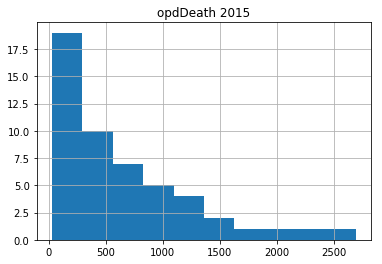

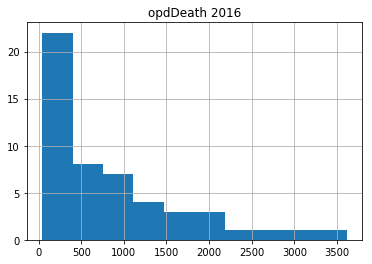

In [45]:
#plt.figure(figsize=(15,10))
#plt.subplot(1,2,1)
from matplotlib import pylab as plab
plt.figure(figsize=(15,10))

year=[2010, 2011,2012,2013,2014,2015,2016]


for i, y in enumerate(year):

        Opiod_combined2.loc[(Opiod_combined2.year==y),['opdDeath']].hist()
        plt.title('opdDeath {}'.format(str(y)) )
     
 
    
 

# Distribution of 50 states based on opioid deaths; There are some states which fall under the category of outliers; 
 

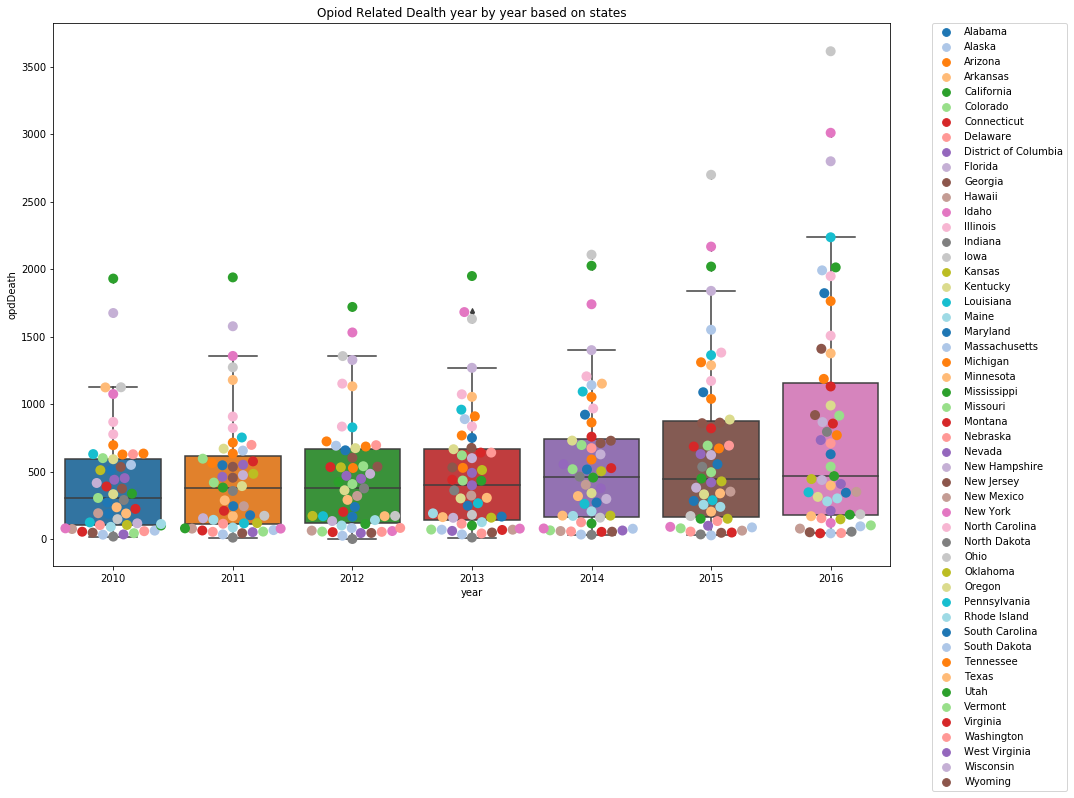

In [38]:
## Some states are outliers

plt.figure(figsize=(15,10))
#?sns.swarmplot()
#?sns.boxplot()
sns.swarmplot(x = 'year', y='opdDeath', data=Opiod_combined2[['opdDeath','year','state']], hue='state', size=10,  palette='tab20')
sns.boxplot(x = 'year', y='opdDeath', data=Opiod_combined2[['opdDeath','year']], color=None)

plt.title('Opiod Related Dealth year by year based on states')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Total Durg overdose death vs Opioid Related Deaths.

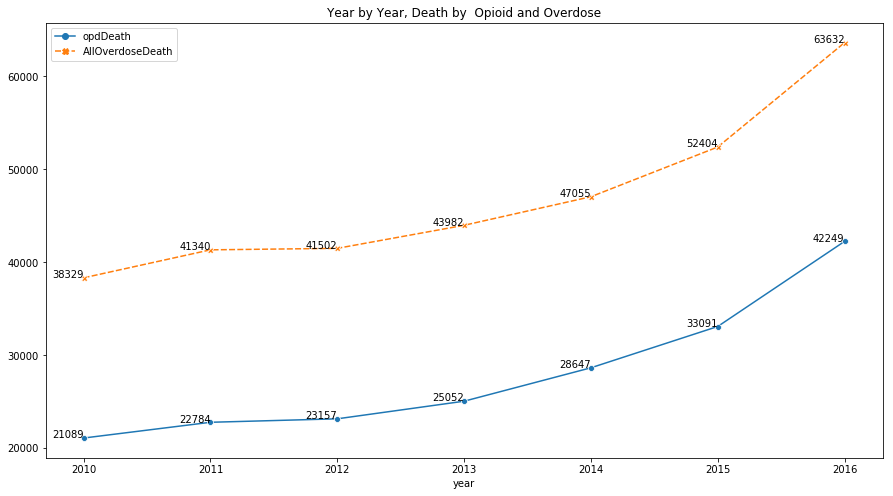

In [59]:
plt.figure(figsize=(15,8))
line=Opiod_combined2[['opdDeath','AllOverdoseDeath','year']].groupby('year').sum()
sns.lineplot(data=line, markers=True)
for i in range(len(yrs)):
    #print(d.loc[yrs[i]])
    #print(str(d['Cummulative_Death_Rate'].loc[ yrs[i]]))
    plt.text(yrs[i],line['opdDeath'].loc[ yrs[i]], str(line['opdDeath'].loc[ yrs[i]]), horizontalalignment='right', size='medium', color='black')
    plt.text(yrs[i],line['AllOverdoseDeath'].loc[ yrs[i]], str(line['AllOverdoseDeath'].loc[ yrs[i]]), horizontalalignment='right', size='medium', color='black')




plt.title("Year by Year, Death by  Opioid and Overdose")
plt.show()

# Total Overdose Dealth Year by Year & Pecentage of Opioid Related death 

In [49]:
YearByYearDeaths=Opiod_combined2[['opdDeath','AllOverdoseDeath','OpdDeath%','year']].groupby('year').sum()
per = np.round((YearByYearDeaths.sum()/YearByYearDeaths['AllOverdoseDeath'].sum())*100 ,1)
total =YearByYearDeaths.sum()
YearByYearDeaths.loc['Total',0:2]=total
YearByYearDeaths.loc['Percentage of Total',0:2]=per
YearByYearDeaths

,opdDeath,AllOverdoseDeath,OpdDeath%
year,,,
2010,21089.0,38329.0,29.36
2011,22784.0,41340.0,28.84
2012,23157.0,41502.0,28.57
2013,25052.0,43982.0,29.89
2014,28647.0,47055.0,31.71
2015,33091.0,52404.0,32.02
2016,42249.0,63632.0,33.03
Total,196069.0,328244.0,NaN
Percentage of Total,59.7,100.0,NaN


# Year by Year Total Precentage Changed and Cummulate Death Rate caused by Opioids.


In [50]:
y1=Opiod_combined2.groupby(['year']).agg({'opdDeath': 'sum', 'AllOverdoseDeath':'sum', 'OpdDeath%': 'mean'})
y1['pct_change']=(y1['OpdDeath%'].pct_change())*100
y1['Cummulative_Death_Rate']= np.round((y1['OpdDeath%'].cumsum())*100,1)

#x['Cumulative']=(x['OpdDeath%'].cumsum())*100
per = np.round((y1.sum()/y1['AllOverdoseDeath'].sum())*100 ,1)

total =y1.sum()

y1.loc['Total']=total
y1.loc['Percentage of Total']=per

y1['OpdDeath%']= np.round((y1['OpdDeath%'])*100,1)
y1.loc['Total']['OpdDeath%','pct_change','Cummulative_Death_Rate']=0
y1.loc['Percentage of Total']['OpdDeath%','pct_change','Cummulative_Death_Rate']=0

y1


,opdDeath,AllOverdoseDeath,OpdDeath%,pct_change,Cummulative_Death_Rate
year,,,,,
2010,21089.0,38329.0,57.6,NaN,57.6
2011,22784.0,41340.0,56.5,-1.771117,114.1
2012,23157.0,41502.0,56.0,-0.936200,170.1
2013,25052.0,43982.0,58.6,4.620231,228.7
2014,28647.0,47055.0,62.2,6.088993,290.9
2015,33091.0,52404.0,62.8,0.977610,353.7
2016,42249.0,63632.0,64.8,3.154279,418.5
Total,196069.0,328244.0,0.0,0.000000,0.0
Percentage of Total,59.7,100.0,0.0,0.000000,0.0


# Visualization of above mentioned table: There is a sudden increase in opoid related death after 2013. Over all cummulative opoid related death has reached  428% since 2010

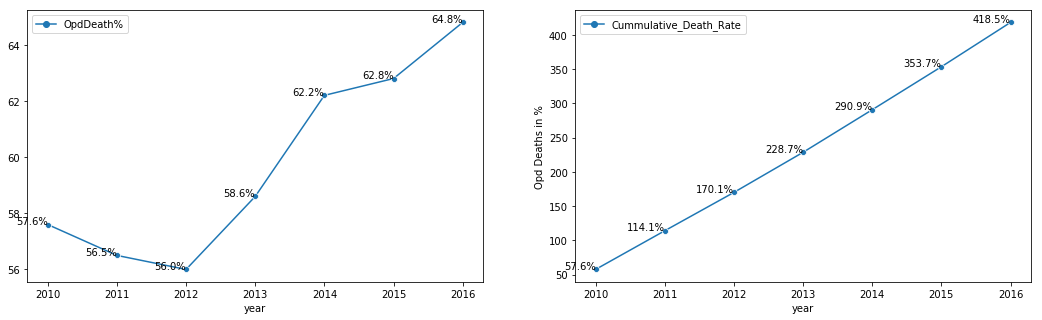

In [51]:

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
yrs=[2010,2011,2012,2013,2014,2015,2016]
d=y1[['OpdDeath%']].loc[yrs]
sns.lineplot(data=d, markers=True)
for i in range(len(yrs)):
    #print(d.loc[yrs[i]])
    #print(str(d['Cummulative_Death_Rate'].loc[ yrs[i]]))
    plt.text(yrs[i],d['OpdDeath%'].loc[ yrs[i]], str(d['OpdDeath%'].loc[ yrs[i]])+'%', horizontalalignment='right', size='medium', color='black')

plt.subplot(1,2,2)
d=y1[['Cummulative_Death_Rate']].loc[yrs]
sns.lineplot(data=d, markers=True)

for i in range(len(yrs)):
    #print(d.loc[yrs[i]])
    #print(str(d['Cummulative_Death_Rate'].loc[ yrs[i]]))
    plt.text(yrs[i],d['Cummulative_Death_Rate'].loc[ yrs[i]], str(d['Cummulative_Death_Rate'].loc[ yrs[i]])+'%', horizontalalignment='right', size='medium', color='black')
    
#    print(yrs[i])

plt.ylabel('Opd Deaths in %')
plt.show()



# Year by Year Percentage change in Opioid Deaths

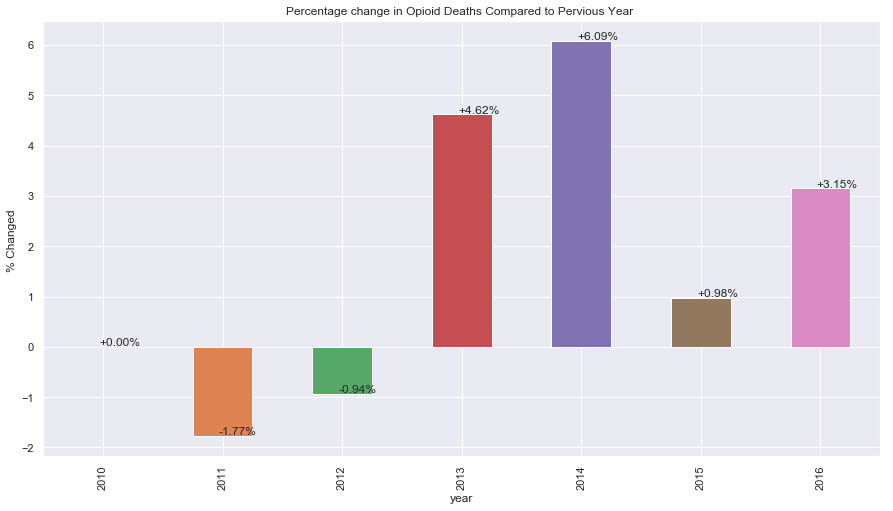

In [150]:
plt.figure(figsize=(15,8))

year_year_pct_change=pd.DataFrame(Opiod_combined2.groupby(['year'])['OpdDeath%'].mean() )
year_year_pct_change['pct_change']=year_year_pct_change['OpdDeath%'].pct_change()*100
#year_year_pct_change

##  in 2013,2014  we saw steep increase in death, now in 2016 again showing growth
#sns.barplot(data=year_year_pct_change, x=year_year_pct_change.index, y='pct_change')
x_offset = -0.03
y_offset = 0.02
ax=year_year_pct_change['pct_change'].plot.bar()

for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)+'%'        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
plt.title("Percentage change in Opioid Deaths Compared to Pervious Year ")
plt.ylabel("% Changed ")
plt.show()

# Opoid Agents which has been extesively used 

In [523]:
t1=Opiod_combined2[['opdDeath','fenty&Tramadol','Oxy&Hydocodone','Methadone','year']].groupby('year').sum()
t1.loc['Total']=t1.sum()
t1

,opdDeath,fenty&Tramadol,Oxy&Hydocodone,Methadone
year,,,,
2010,21089,2974,10937,4547
2011,22784,2611,11689,4402
2012,23157,2592,11134,3922
2013,25052,3066,11342,3561
2014,28647,5529,12159,3358
2015,33091,9549,12727,3260
2016,42249,19388,14487,3343
Total,196069,45709,84475,26393


# Year by Year Opioid Related Death Compared with Type of Opioid

In [62]:
# We see a sharp increase in the fentryl and Tramadol after 2013

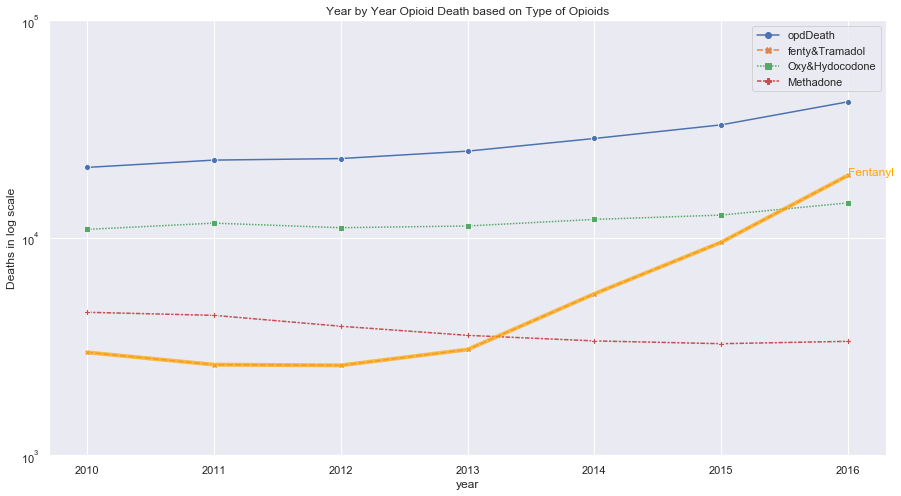

In [196]:
plt.figure(figsize=(15,8))
drugSummary=Opiod_combined2[['opdDeath','fenty&Tramadol','Oxy&Hydocodone','Methadone','year']].groupby('year').sum()
sns.lineplot(data=drugSummary, markers=True)


# Now re do the interesting curve, but biger with distinct color 
plt.plot(drugSummary.index,drugSummary['fenty&Tramadol'],marker='', color='orange', linewidth=4, alpha=0.7) 


plt.text(2016, drugSummary['fenty&Tramadol'].tail(1), 'Fentanyl',horizontalalignment='left', size='medium', color='orange')

plt.yscale('log')
plt.ylabel('Deaths in log scale')
plt.yticks([1000,10000,100000])
plt.title("Year by Year Opioid Death based on Type of Opioids")
plt.show()


# Which state are leading in 5 years in opioid vs Total overdose related deaths


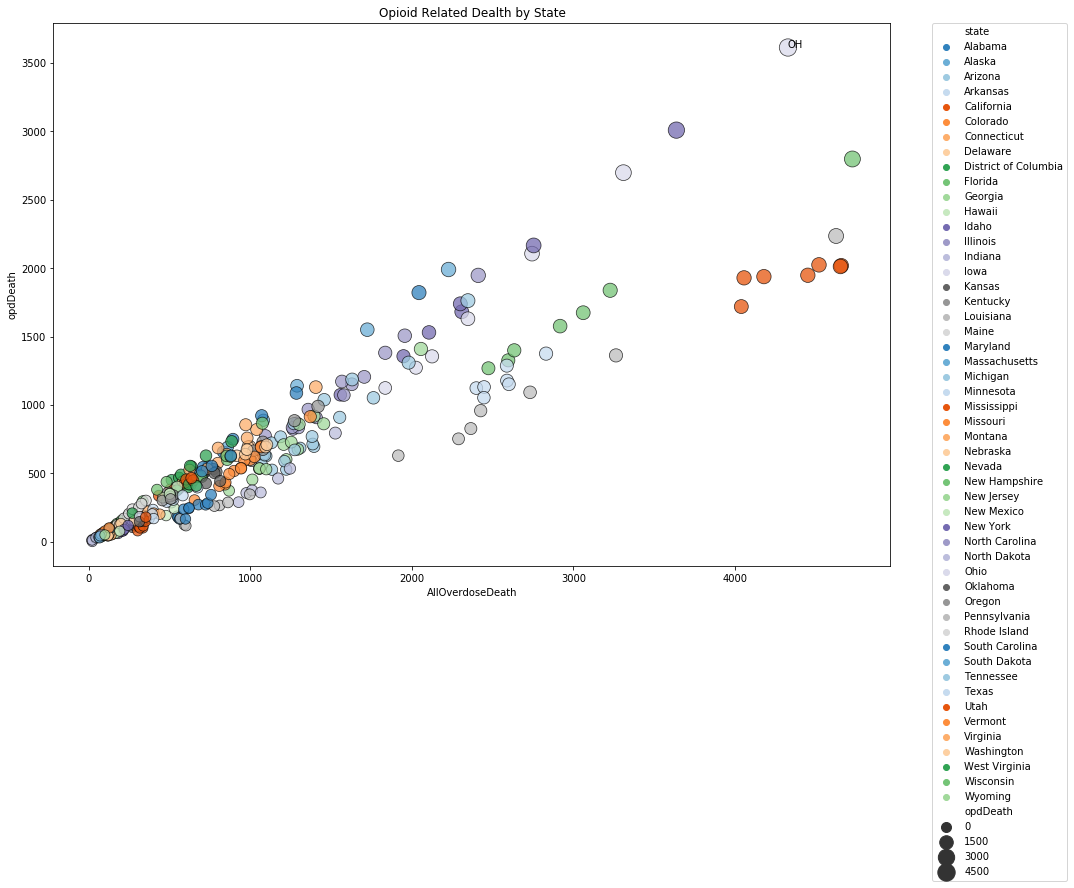

In [40]:
## top 10 states

plt.figure(figsize=(15,10))
top_states=Opiod_combined2.sort_values( by='opdDeath', ascending=False)
#sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=top_10_states, hue='state', size="opdDeath", sizes=(100,300)
#                ,alpha=.75, legend=False)
sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=Opiod_combined2, hue='state', size="opdDeath", sizes=(100,300)
                , palette='tab20c', edgecolor='black'
                 ,alpha=.75)

g=plt.title('Opioid Related Dealth by State')
plt.text(top_states['AllOverdoseDeath'].head(1),top_states['opdDeath'].head(1), 'OH', horizontalalignment='left', size='medium', color='black')

#plt.xscale('log')

 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# In the Swarm/Box plot we saw some outlier states, lets find out what are the top 15 states for the 2016

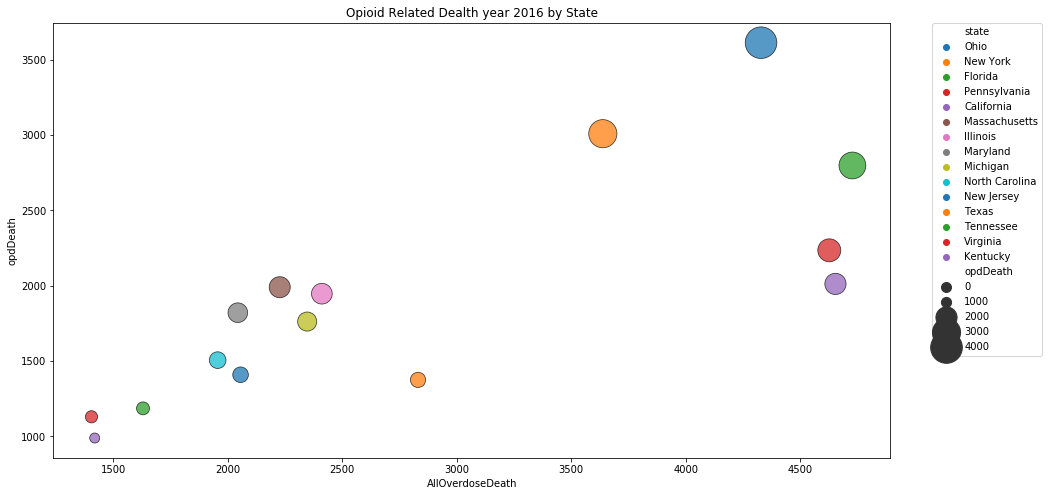

In [48]:
## top 10 states

plt.figure(figsize=(15,8))

top_10_states=Opiod_combined2[Opiod_combined2.year==2016].sort_values( by='opdDeath', ascending=False).head(15)
#top_10_states=Opiod_combined2.sort_values( by='opdDeath', ascending=False) 


#sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=top_10_states, hue='state', size="opdDeath", sizes=(100,300)
#                ,alpha=.75, legend=False)
sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=top_10_states, hue='state', size="opdDeath", sizes=(100,1000)
                , palette='tab10', edgecolor='black'
                 ,alpha=.75)

g=plt.title('Opioid Related Dealth year 2016 by State')
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Year by Year, top 15 States leading in Opioid vs Overall Drug Overdose Deaths  

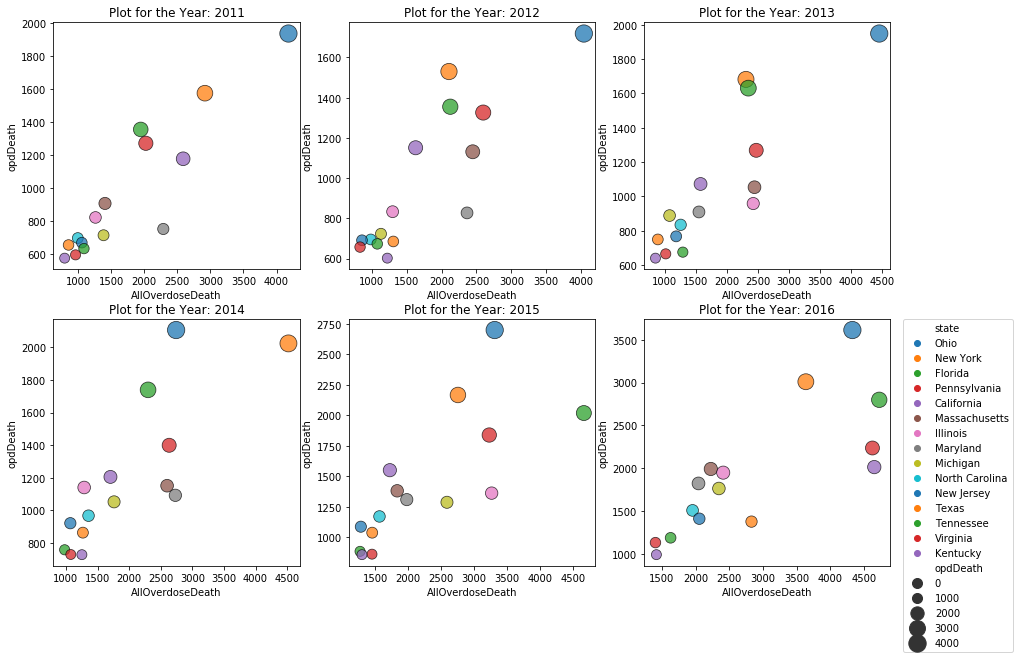

In [690]:
f=plt.figure(figsize=(15,10))
y=[2011,2012,2013,2014,2015,2016]
 
for i , yr in enumerate(y,1):
    plt.subplot(2,3,i)
    plt.title("Plot for the Year: {}".format(yr))
    
    if (i<=5):
        sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=Opiod_combined2[Opiod_combined2.year==yr].sort_values( by='opdDeath', ascending=False).head(15),
                     hue='state', size="opdDeath", sizes=(100,300)
                     , palette='tab10', edgecolor='black'
                     , alpha=.75, legend=False,   
                   )
    if (i==6):
        sns.scatterplot(y='opdDeath',x='AllOverdoseDeath', data=Opiod_combined2[Opiod_combined2.year==yr].sort_values( by='opdDeath', ascending=False).head(15),
                     hue='state', size="opdDeath"
                     , palette='tab10',edgecolor='black'
                     , sizes=(100,300)
                     , alpha=.75
                     
                   )
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
plt.show()

 


# Year by Year deaths, Top 10 States


In [63]:
# we see California and Taxas deaths flattend but there is sharp increase in other states

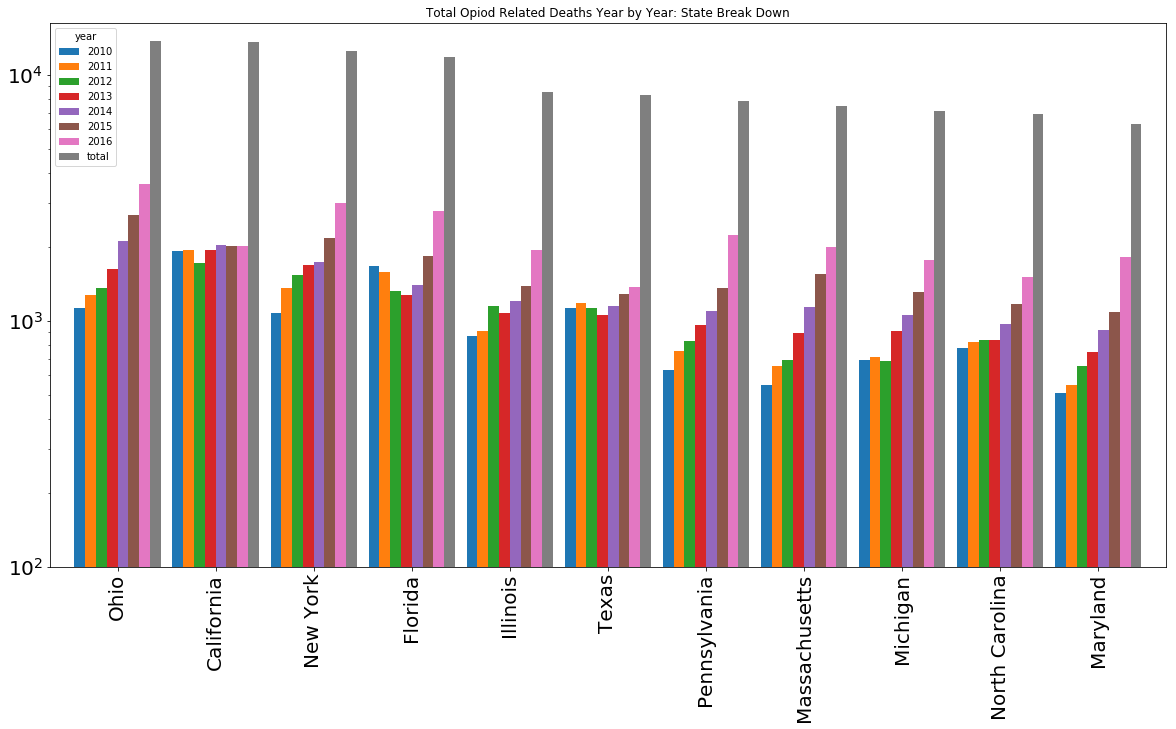

In [177]:
line=Opiod_combined2[['state','year','opdDeath']].pivot(index='state',columns='year', values='opdDeath')
line['total']=line[2010]+line[2011]+line[2012]+line[2013]+line[2014]+line[2015]+line[2016]
line.sort_values('total', ascending=False).head(11).plot.bar(figsize=(20,10),fontsize=20, width=.88)
plt.title("Total Opioid Related Deaths Year by Year: State Break Down")
plt.xlabel("")
plt.yscale('log')
plt.yticks([100,1000,10000])
plt.show()


# Death by year and type of drugs

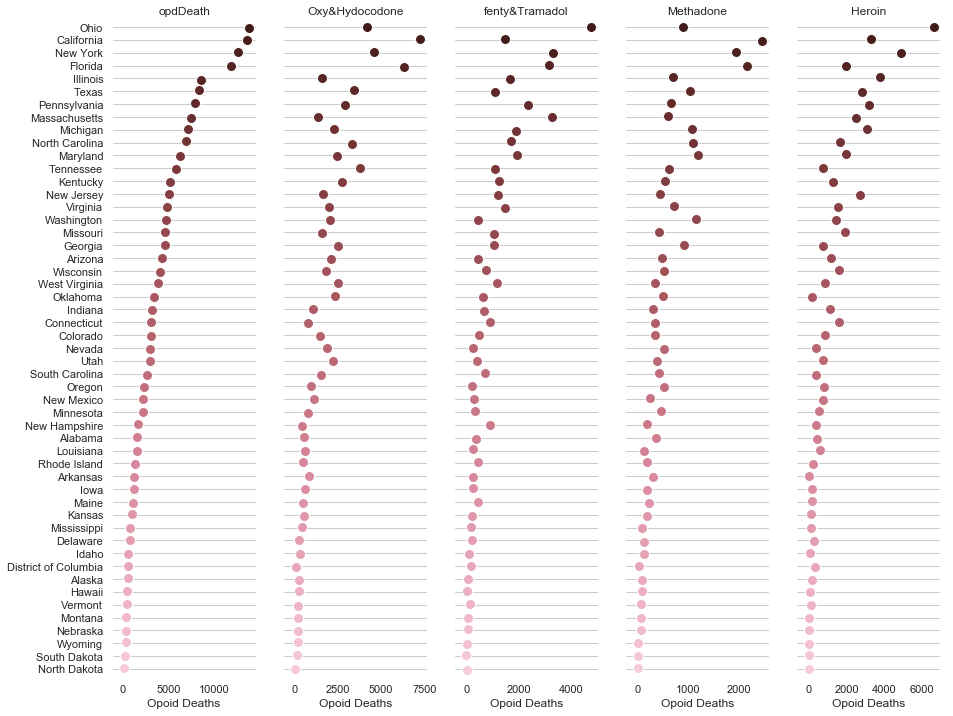

In [24]:

sns.set(style="whitegrid")
#grid=Opiod_combined2[['state','opdDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']]
#grid=Opiod_combined2[['state','opdDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']].groupby('state').sum()

#Group by with index set
grid=Opiod_combined2[['state','opdDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone',
                      'Heroin']].groupby('state').sum()

# convert index to column
grid.reset_index(inplace=True)
grid
#grid.stack()
## make a pair plot
g=sns.PairGrid(grid.sort_values("opdDeath", ascending=False), 
               x_vars= grid.columns[1:], y_vars=["state"],  # take value from first column
               height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set( xlabel="Opoid Deaths", ylabel="")
titles=['opdDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)


# Top 10 States for Opoid Deaths Heat Map

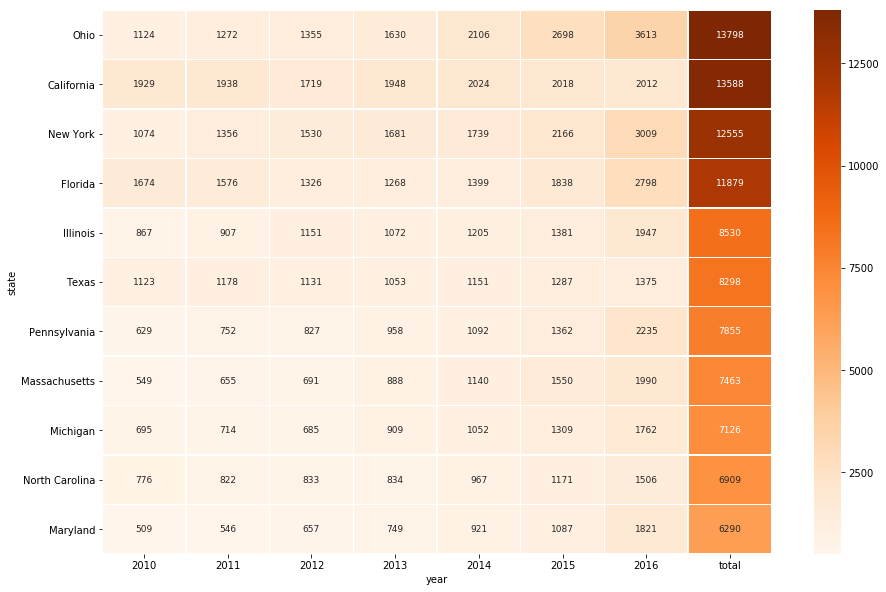

In [70]:
line=Opiod_combined2[['state','year','opdDeath']].pivot(index='state',columns='year', values='opdDeath')
line['total']=line[2010]+line[2011]+line[2012]+line[2013]+line[2014]+line[2015]+line[2016]


plt.figure(figsize=(15,10))

fmt=lambda x, pos:'{:0}'.format(x) ## changing the format to 0 decimal pace

sns.heatmap(data=line.sort_values('total', ascending=False).head(11), annot=True,linewidth=.5, 
            #fmt='f', ## float
            fmt='0',
            #cmap="PiYG",
            #cmap='hsv',
            #cmap='coolwarm'
            cmap='Oranges',
            annot_kws={"size": 9}
           
           )
plt.show()


# Get the Data Ready for the Map

In [106]:
import altair as alt
from vega_datasets import data
# saving data into a file rather than embedding into the chart
opd_death_summary=Opiod_combined2[['state','opdDeath','year']]

alt.data_transformers.enable('json') 

# jupyter notebook needs this option.
alt.renderers.enable('notebook')
states = alt.topo_feature(data.us_10m.url, 'states')


t=pd.read_csv('https://vega.github.io/vega-datasets/data/population_engineers_hurricanes.csv')
t=t[['id','state']]

temp1=pd.merge(Opiod_combined2, t, how='inner', left_on='state', right_on='state')

#Opiod_combined2.head()
opd_death_summary_2016=temp1[temp1.year==2016]
 



# Map of 2016 Opoid related Death in USA

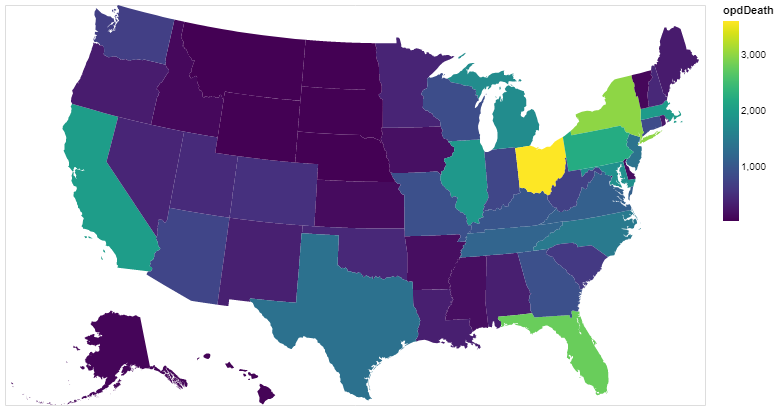

In [107]:
 
opd_death_summary_2016.dropna()

alt.Chart(states).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(opd_death_summary_2016, 'id',['opdDeath'])
).encode(
    color='opdDeath:Q'
).properties(
    width=700,
    height=400
) 
                                                                                                      


# Death by different type of Opioids

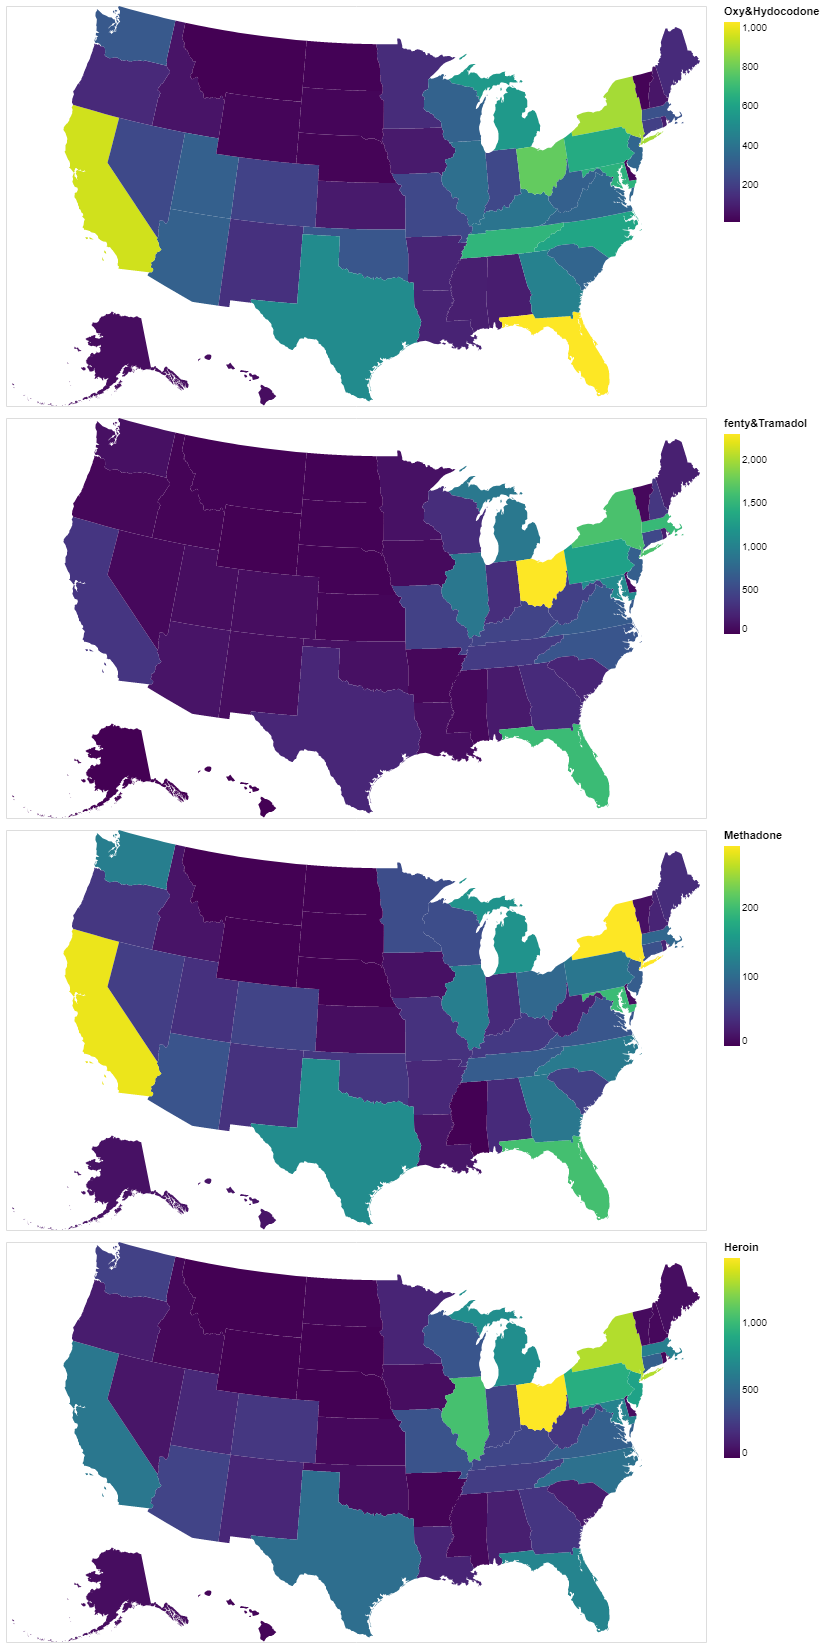

In [108]:
druglist=['Oxy&Hydocodone','fenty&Tramadol','Methadone','Heroin']

alt.Chart(states).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(opd_death_summary_2016, 'id',druglist)
).encode(
    alt.Color(alt.repeat('row'), type='quantitative')
    
).properties(
    width=700,
    height=400
).repeat(
    row=druglist
).resolve_scale(
    color='independent'
)

# Relationship between opioid death and total Overdose deaths with r2=.87 which  showes  strong relationship

C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


<Figure size 1080x576 with 0 Axes>

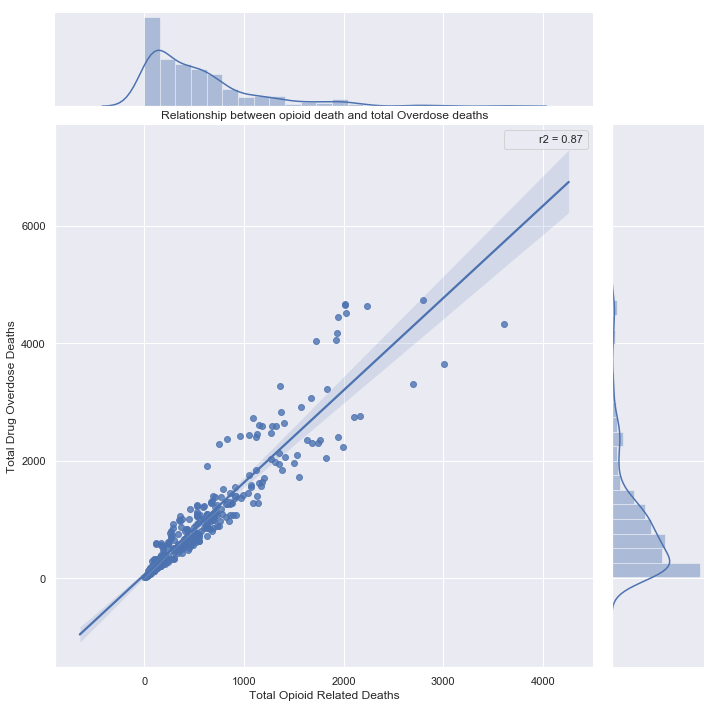

In [197]:
plt.figure(figsize=(15,8))

from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
x=Opiod_combined2.opdDeath
y=Opiod_combined2.AllOverdoseDeath

from matplotlib import pylab as plab

sns.set(style='darkgrid')

g=sns.jointplot(x='opdDeath', y='AllOverdoseDeath', data=Opiod_combined2, kind="reg" , stat_func=r2 ,size=(10)    )

g=g.set_axis_labels('Total Opioid Related Deaths')
plt.ylabel('Total Drug Overdose Deaths')
plt.title('Relationship between opioid death and total Overdose deaths')
plt.show()

# Relationship between Opioid Death and Different kinds of Opioid Drugs

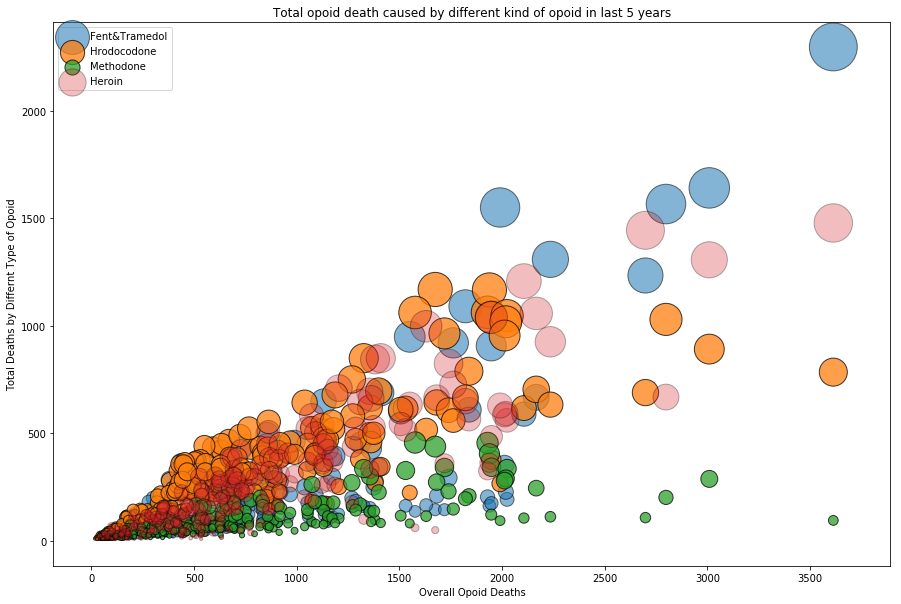

In [750]:
plt.figure(figsize=(15,10))
plt.scatter(Opiod_combined2.opdDeath, Opiod_combined2['fenty&Tramadol'], s= (Opiod_combined2['fenty&Tramadol']), alpha=.55 ,label='Fent&Tramedol', edgecolor='black')
plt.scatter(Opiod_combined2.opdDeath, Opiod_combined2['Oxy&Hydocodone'], s= (Opiod_combined2['Oxy&Hydocodone']),  alpha=.75 ,label='Hrodocodone', edgecolor='black')
plt.scatter(Opiod_combined2.opdDeath, Opiod_combined2.Methadone, s=  (Opiod_combined2.Methadone), alpha=.75 , label='Methodone', edgecolor='black')
plt.scatter(Opiod_combined2.opdDeath, Opiod_combined2.Heroin,s=(Opiod_combined2.Heroin), alpha=.30 ,label='Heroin', edgecolor='black')

plt.xlabel('Overall Opoid Deaths')
plt.ylabel('Total Deaths by Differnt Type of Opoid')
plt.title('Total opoid death caused by different kind of opoid in last 5 years')
plt.legend() ## show legend
plt.show()

# Relationship between Multiple Veriables

C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value enco

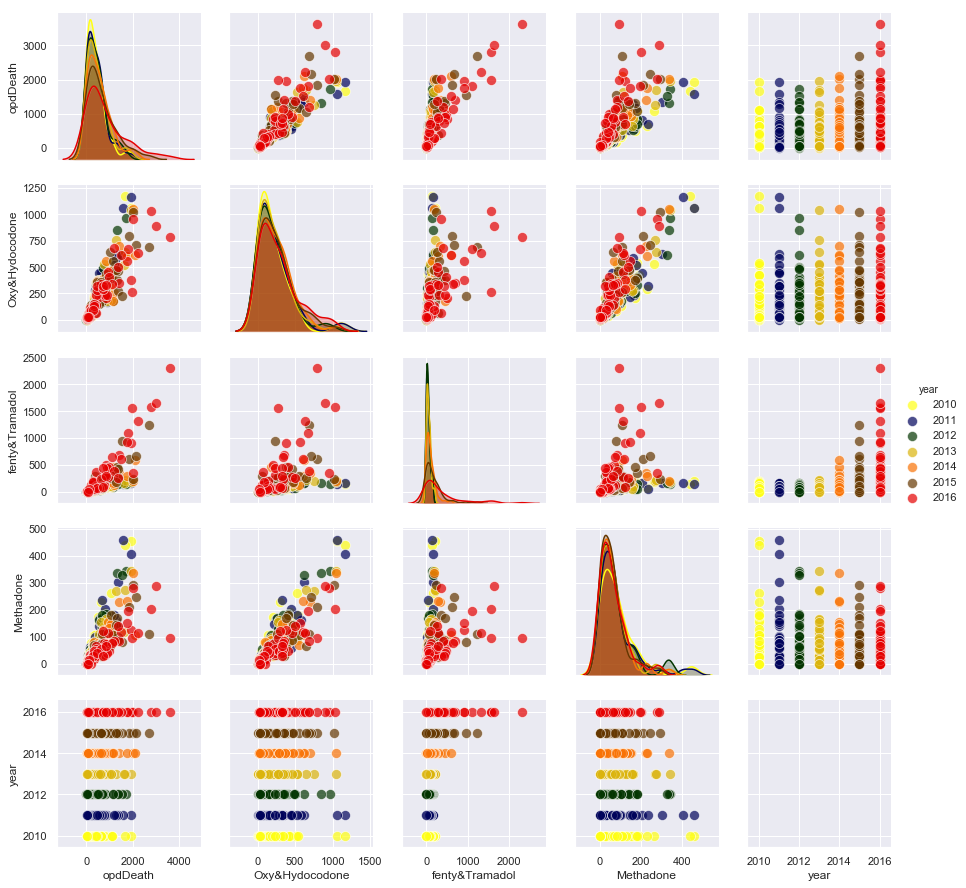

In [191]:
cor=Opiod_combined2[['opdDeath','Oxy&Hydocodone','fenty&Tramadol','Methadone','year']]
palette = sns.xkcd_palette(['yellow','dark blue', 'dark green', 'gold', 'orange','brown','red' ])
# plt.subplot(1,4,1)
# g=sns.lmplot(data=cor, x='opdDeath', y='Oxy&Hydocodone' )
# plt.subplot(1,4,2)
# g=sns.lmplot(data=cor, x='opdDeath', y='fenty&Tramadol' )
# plt.subplot(1,4,3)
# g=sns.lmplot(data=cor, x='opdDeath', y='Methadone' )
# plt.subplot(1,4,4)
# g=sns.lmplot(data=cor, x='opdDeath', y='Heroin' )

sns.pairplot(cor, hue='year' , palette= palette , kind='scatter' ,plot_kws={"s": 100,"alpha":.70} ,  diag_kws=dict(shade=True))


# Analysis of  Demographic Variables

In [198]:
opiod_df = pd.read_csv("https://raw.githubusercontent.com/rashray/Opiod-Epidemic-Project/master/data/Final_OpiodData2010_2016.csv")

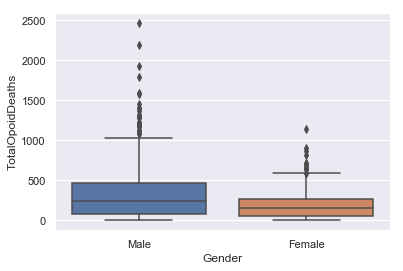

In [199]:
bygenderMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['Male', 'Female'], var_name = ["Gender"], value_name = "TotalOpoidDeaths")
sns.boxplot(data=bygenderMelt, x = "Gender", y = "TotalOpoidDeaths")

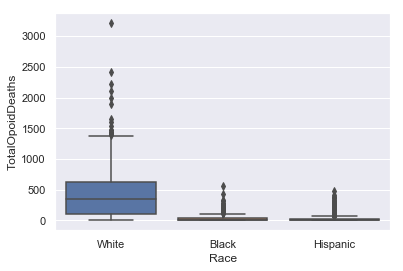

In [200]:
byraceMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['White', 'Black', 'Hispanic'], var_name = ['Race'], value_name = 'TotalOpoidDeaths')
byraceMelt.head()
sns.boxplot(data=byraceMelt, x = "Race", y = "TotalOpoidDeaths")

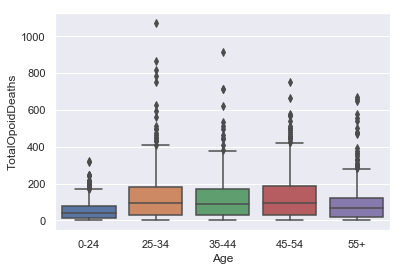

In [201]:
byageMelt=pd.melt(opiod_df, id_vars=['state', 'year'], value_vars=['0-24', '25-34', '35-44', '45-54', '55+'], var_name = ['Age'], value_name = 'TotalOpoidDeaths')
sns.boxplot(data=byageMelt, x = "Age", y = "TotalOpoidDeaths")

C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


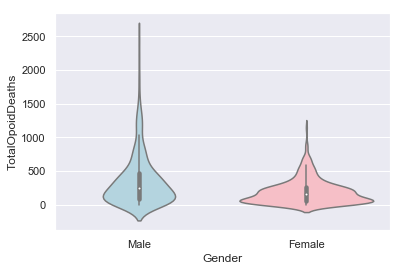

In [202]:
sns.violinplot("Gender", "TotalOpoidDeaths", data=bygenderMelt,
               palette=["lightblue", "lightpink"]);

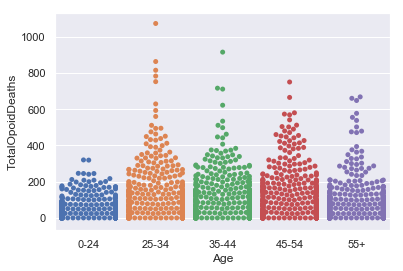

In [206]:
sns.swarmplot(x="Age", y="TotalOpoidDeaths", data=byageMelt, dodge=True )

C:\Users\vchauha6\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


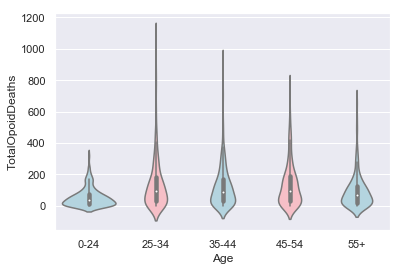

In [207]:
sns.violinplot("Age", "TotalOpoidDeaths", data=byageMelt,
               palette=["lightblue", "lightpink"]);

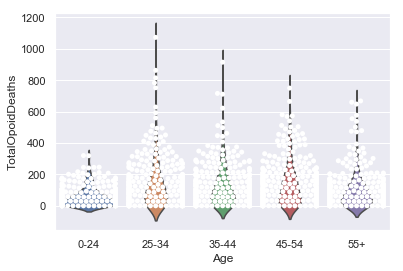

In [209]:

ax = sns.violinplot(x="Age", y="TotalOpoidDeaths", data=byageMelt, inner=None, );
ax = sns.swarmplot(x="Age", y="TotalOpoidDeaths", data=byageMelt, color="white", edgecolor="gray")

# Correlation

In [3]:
prescriptions = pd.read_csv('https://raw.githubusercontent.com/rashray/Opiod-Epidemic-Project/master/data/State_Drug_Utilization_Data_2017-2013%20Opioids.csv')
prescriptions.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Product Group Name,Suppression Used,...,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,MA,10702,18,50,2017,1,OXYCODONE,OXYCODONE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,42.2373,-71.5314,"(42.2373, -71.5314)",10702001850
1,MCOU,UT,57664,370,88,2017,1,OXYCODONE,OXYCODONE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,40.1135,-111.8535,"(40.1135, -111.8535)",57664037088
2,MCOU,AZ,228,3505,6,2017,1,MORPHINE S,MORPHINE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,33.7712,-111.3877,"(33.7712, -111.3877)",228350506
3,FFSU,IL,57664,370,88,2017,1,OXYCODONE,OXYCODONE,False,...,12.0,210.23,210.23,0.0,1-Jan,1/1/2017 0:00,40.3363,-89.0022,"(40.3363, -89.0022)",57664037088
4,MCOU,GA,68308,841,1,2017,1,Oxycodone,OXYCODONE,False,...,94.0,770.95,770.95,0.0,1-Jan,1/1/2017 0:00,32.9866,-83.6487,"(32.9866, -83.6487)",68308084101


In [4]:
deaths = pd.read_csv('https://raw.githubusercontent.com/rashray/Opiod-Epidemic-Project/master/data/Final_OpiodData2010_2016.csv')
deaths.head()

,Unnamed: 0,state,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,...,Race_Total,Male,Female,GenderTotal,0-24,25-34,35-44,45-54,55+,AgeTotal
0,1,Alabama,187,547,0.34,2010,82,34,78,0,...,177,117,70,187,24,61,43,44,15,187
1,2,Alaska,62,83,0.75,2010,38,10,25,0,...,49,32,30,49,0,12,17,20,0,62
2,3,Arizona,626,1098,0.57,2010,327,68,106,90,...,593,372,254,626,86,138,116,168,118,626
3,4,Arkansas,189,350,0.54,2010,118,57,56,0,...,177,101,88,189,30,53,47,35,24,189
4,5,California,1929,4057,0.48,2010,1063,205,456,326,...,1874,1225,704,1929,201,304,349,573,502,1929


In [5]:
state_crosswalk = {'Alabama':'AL',
'Alaska':'AK',
'Arizona':'AZ',
'Arkansas':'AR',
'California':'CA',
'Colorado':'CO',
'Connecticut':'CT',
'Delaware':'DE',
'Florida':'FL',
'Georgia':'GA',
'Hawaii':'HI',
'Idaho':'ID',
'Illinois':'IL',
'Indiana':'IN',
'Iowa':'IA',
'Kansas':'KS',
'Kentucky':'KY',
'Louisiana':'LA',
'Maine':'ME',
'Maryland':'MD',
'Massachusetts':'MA',
'Michigan':'MI',
'Minnesota':'MN',
'Mississippi':'MS',
'Missouri':'MO',
'Montana':'MT',
'Nebraska':'NE',
'Nevada':'NV',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New Mexico':'NM',
'New York':'NY',
'North Carolina':'NC',
'North Dakota':'ND',
'Ohio':'OH',
'Oklahoma':'OK',
'Oregon':'OR',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'South Carolina':'SC',
'South Dakota':'SD',
'Tennessee':'TN',
'Texas':'TX',
'Utah':'UT',
'Vermont':'VT',
'Virginia':'VA',
'Washington':'WA',
'West Virginia':'WV',
'Wisconsin':'WI',
'Wyoming':'WY',
'District of Columbia':'DC'                  
}

In [6]:

deaths = deaths.replace(state_crosswalk)
deaths.head(10)

,Unnamed: 0,state,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,...,Race_Total,Male,Female,GenderTotal,0-24,25-34,35-44,45-54,55+,AgeTotal
0,1,AL,187,547,0.34,2010,82,34,78,0,...,177,117,70,187,24,61,43,44,15,187
1,2,AK,62,83,0.75,2010,38,10,25,0,...,49,32,30,49,0,12,17,20,0,62
2,3,AZ,626,1098,0.57,2010,327,68,106,90,...,593,372,254,626,86,138,116,168,118,626
3,4,AR,189,350,0.54,2010,118,57,56,0,...,177,101,88,189,30,53,47,35,24,189
4,5,CA,1929,4057,0.48,2010,1063,205,456,326,...,1874,1225,704,1929,201,304,349,573,502,1929
5,6,CO,304,654,0.46,2010,135,58,48,46,...,301,178,126,304,38,64,65,90,47,304
6,7,CT,223,363,0.61,2010,41,22,43,77,...,222,154,69,223,25,38,63,76,21,223
7,8,DE,103,145,0.71,2010,47,14,20,16,...,92,58,45,0,0,0,0,0,0,103
8,9,DC,34,78,0.44,2010,0,0,0,16,...,0,0,0,24,0,0,10,14,0,34
9,10,FL,1674,3061,0.55,2010,1169,146,439,51,...,1646,1104,570,1674,171,409,369,452,273,1674


In [7]:
deaths2 = deaths.loc[:,['state','year','opdDeath']]

In [8]:
prescriptions2 = prescriptions.loc[:,['State','Year','Number of Prescriptions']]

In [9]:

prescriptions3 = prescriptions2.groupby(['State','Year']).sum()

In [10]:

df1 = pd.merge(deaths2,prescriptions3,how = 'inner', left_on = ['state','year'], right_on = ['State','Year'])
df1.head(10)

,state,year,opdDeath,Number of Prescriptions
0,AL,2013,166,157112.0
1,AK,2013,69,34938.0
2,AZ,2013,527,683616.0
3,AR,2013,162,73026.0
4,CA,2013,1948,976925.0
5,CO,2013,433,312684.0
6,CT,2013,439,350467.0
7,DE,2013,113,129080.0
8,DC,2013,60,64895.0
9,FL,2013,1268,816904.0


In [11]:
x = df1['Number of Prescriptions']
y = df1['opdDeath']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

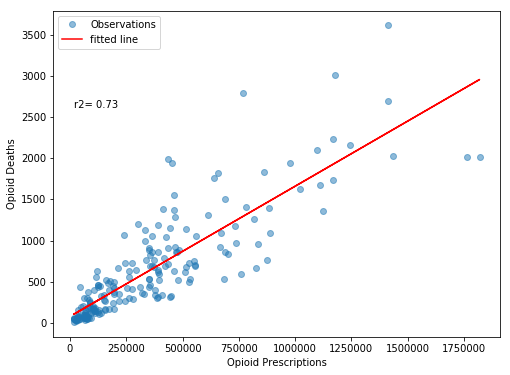

In [12]:
plt.figure(figsize=(8,6))

my_string = 'r2= {}'.format(np.round(r_value**2,2))
plt.plot(x, y, 'o', alpha =0.5, label='Observations')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')

plt.xlabel('Opioid Prescriptions')
plt.ylabel('Opioid Deaths')
plt.legend(loc='upper left')
plt.text(min(x)-100,max(y)-1000,my_string)
plt.show()

In [13]:
state_array = df1['state'].unique()

In [14]:
r2_array = []

for state_abv in state_array :
    x = df1[ df1['state']==state_abv ]['Number of Prescriptions']
    y = df1[ df1['state']==state_abv ]['opdDeath']
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    r2_array.append(np.round(r_value**2,2))

In [15]:

df_r2 = pd.DataFrame({'state':state_array, 'r2':r2_array})

In [16]:
df_r2 = df_r2.sort_values(by = 'r2', ascending = False)

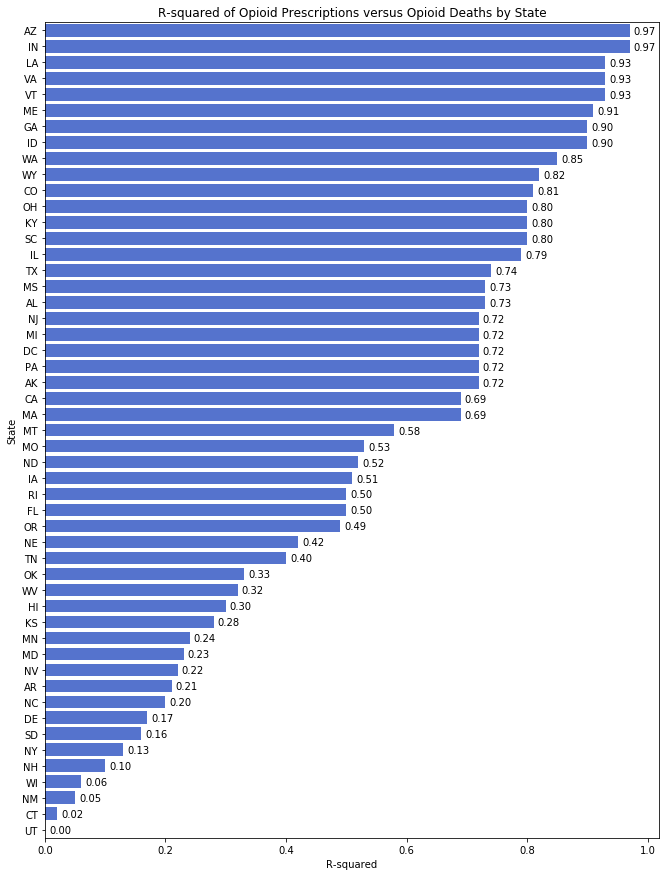

In [17]:
x = df_r2['r2']
y = df_r2['state']

fig, ax = plt.subplots(figsize=(11,15))
plt.title('R-squared of Opioid Prescriptions versus Opioid Deaths by State')
sns.barplot(x,y,color = 'royalblue', ax=ax)
plt.xlabel('R-squared')
plt.ylabel('State')
for p in ax.patches:
    width = p.get_width()
    plt.text(.025+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')